<a href="https://colab.research.google.com/github/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture07/notebook/simulation_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title :
Exercise: CS109A Olympics

## Description :

<img src="https://github.com/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture07/fig/fig1.png?raw=1" style="width: 500px;">

## Data Description:

## Instructions:

- In this exercise, you will simulate the 100m sprint race discussed during the lecture.
- We have already defined for you a Sprinter() class which has two characteristics for each sprinter:
    - Base time
    - Performance variance
- Run the code cell that makes four instances of the `Sprinter()` class. You will work with those for the entire exercise.
- Call the time attribute of the helper class to get the time taken by a competitor in the actual race.
- First run the race simulation five times; you will do this by creating a dictionary with participant name as keys, and time taken in a simulated race as the values. You will sort this dictionary by values and determine the winner of the simulated race.
- Repeat the simulation of the race for 10,000 times and count who won the race for how many times. Based on this observation, you will then investigate why a particular participant won as many times?
- Repeat the simulation for 10,000 times, but this time get the distribution of times for each participant over these runs.
- Calculate the mean race time, standard deviation of the race time and the confidence interval for each participant.
- Use the helper code to observe a plot similar to the one given below:
    
<img src="https://github.com/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture07/fig/fig2.png?raw=1" style="width: 500px;">

## Hints:

<a href="https://realpython.com/python-counter/" target="_blank">Counter()</a>
Helps accumulating counts of objects in a certain data structure.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html" target="_blank">np.mean()</a>
Used to calculate the mean of an array.

<a href="https://www.w3schools.com/python/ref_func_sorted.asp" target="_blank">sorted()</a>
Used to sort data.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html" target="_blank">np.std()</a>
Used to calculate the std deviation of an array.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.percentile.html" target="_blank">np.percentile</a>
Used to calculate percentile of data inbetween a given range. Frequently used for calculating confidence intervals.

## PyDS Olymipics : 100m dash
We are going to have 4 of our team members compete against each other in the 100m dash.

In [2]:
# Importing libraries
import numpy as np
from time import sleep
import os
from IPython.display import clear_output
from collections import Counter


from time import sleep

import numpy as np
from IPython.display import clear_output


class Sprinter:

    def __init__(self, base_speed, variance):
        self.base_speed = base_speed
        self.variance = variance

    @property
    def time(self):
        return np.random.normal(loc=self.base_speed, scale=self.variance)


def run_sim(race, winner):
    for i in range(1, 11):
        clear_output(wait=True)
        print("|START|" + "\n|START|".join(['----' * min(10, int((15 * i) / race[runner])) + '    ' * (
                    10 - min(10, int((15 * i) / race[runner]))) + '|' + runner for runner in race.keys()]))
        sleep(0.5)

    print(f'\nThe winner is {winner[0]} with a time of {winner[1]:.2f}s!')
import matplotlib.pyplot as plt
from prettytable import PrettyTable
plt.xkcd(scale=0,randomness=4)

## Taking a look at the competitors
Each participant has a characteristic assigned to him. The characteristic has 2 parts :

1. Base speed : This is the time they gave in a non-competitive environment.
2. Performance variance : Based on the mood, weather and other conditions this measure determines how much a participant's time will vary.

In [5]:
# Name of sprinters
sprinters = ['Pavlos','Hargun','Joy','Hayden']
# Defining charactersistics, ('Base pace','performance variance')
characteristics = [(13,0.25),(12.5,0.5),(12.25,1),(14.5,1)]
sprinters_dict = {}
for idx,sprinter in enumerate(sprinters):
    sprinters_dict[sprinter] = Sprinter(*characteristics[idx])

sprinters_dict

{'Pavlos': <__main__.Sprinter at 0x7e753c4fae10>,
 'Hargun': <__main__.Sprinter at 0x7e7508559d50>,
 'Joy': <__main__.Sprinter at 0x7e7508976c10>,
 'Hayden': <__main__.Sprinter at 0x7e75080b4fd0>}

## Running a race
`sprinters_dict` has keys as the name of each participant, and the value as a class. The `time` attribute of the class is the time taken by that person to run a race.
- Call `sprinters_dict['Pavlos'].time` for 10 different times.

In [18]:
# Call time attribute

sprinters_dict["Pavlos"].time

12.915497659579371

- Get the times for each participant by calling the `time` attribute.
- Create a dictionary called `race`, which has the key as the name of the participant and value as the time taken by participant to run the race.
- Sort `race.items()` according to time and get the item in dictionary with the least time taken to finish and assign it to `winner`.

Note: The time taken by a participant to finish the race is the value of the dictionary so remember to sort by values

In [20]:
# Get the times for each participant and make a dictionary
race = {sprinter: dash.time for sprinter, dash in sprinters_dict.items()}

# Sort the items of the dictionary to get the winner
# Hint: Remember to sort by the values and not the keys
winner = sorted(race.items(), key=lambda x: x[1])[0]

race

{'Pavlos': 13.394178423280149,
 'Hargun': 13.340377160907043,
 'Joy': 12.449498749784702,
 'Hayden': 14.35912381164899}

## Race simulation

As you would have noticed, every time you make a new dictionary `race`, the results would differ.

Redefine the `race` dictionary, and run the cell below for a simulation of the race!

In [21]:
# Again get the times for each participant and make a dictionary
race = {sprinter: dash.time for sprinter, dash in sprinters_dict.items()}
# Then sort the items of the dictionary to get the winner
winner = sorted(race.items(), key=lambda x: x[1])[0]

# Execute the following code
for i in range(1,11):
    clear_output(wait=True)
    print("|START|"+"\n|START|".join(['----'*min(10,int((15*i)/race[runner]))+ '    '*(10-min(10,int((15*i)/race[runner])))+'|'+runner for runner in race.keys()]))
    sleep(0.5)

print(f'\nThe winner is {winner[0]} with a time of {winner[1]:.2f}s!')


|START|----------------------------------------|Pavlos
|START|----------------------------------------|Hargun
|START|----------------------------------------|Joy
|START|----------------------------------------|Hayden

The winner is Pavlos with a time of 12.89s!


## Multiple simulations
Earlier was just one race, we want to find out who performs better over multiple races. So let's run the race 5 times

- Run a loop for 5 times
- In each loop generate the race dictionary as done earlier, and get the winner after sorting `race.items()`
- Append winners to the `winner_list`

Keep track of everyone's timings

In [22]:
# Run the simulation and append winners to the winner_list
winner_list = []
for simulation in range(5):
    race = {sprinter: dash.time for sprinter, dash in sprinters_dict.items()}
    winner = sorted(race.items(), key=lambda x: x[1])[0]
    winner_list.append(winner)


winner_list

[('Joy', 11.044860377059905),
 ('Joy', 11.628778387255617),
 ('Joy', 10.444956092106379),
 ('Joy', 11.24237848614198),
 ('Hargun', 11.3948828910004)]

### Even more simulations

We will run 10,000 simulations and use the `Counter` to see who wins how many times.

Check the hints for how to use `Counter()`.

In [23]:
# Run the simulation and append winners to the winner_list
winner_list = []
for simulation in range(10000):
    race = {sprinter: dash.time for sprinter, dash in sprinters_dict.items()}
    winner = sorted(race.items(), key=lambda x: x[1])[0]
    winner_list.append(winner)

winner_list

[('Joy', 12.143060914796733),
 ('Hargun', 12.80387743182571),
 ('Hargun', 12.254575082652746),
 ('Joy', 12.32938772169491),
 ('Hargun', 12.605538748425225),
 ('Hargun', 12.643916248320268),
 ('Joy', 11.98774579870064),
 ('Joy', 10.643081295877224),
 ('Hargun', 11.719906539312507),
 ('Hargun', 11.351878822252887),
 ('Hargun', 11.44377853349668),
 ('Joy', 11.060816684435165),
 ('Joy', 11.335851491739882),
 ('Joy', 11.303383131925942),
 ('Hargun', 12.36125864808527),
 ('Joy', 10.53694779130873),
 ('Hargun', 12.356063067349133),
 ('Hayden', 12.479180506134776),
 ('Joy', 12.010938759245713),
 ('Joy', 11.600695226593656),
 ('Hayden', 12.755001121814225),
 ('Hargun', 11.81571969761144),
 ('Hargun', 12.480963719212195),
 ('Joy', 12.367007463778169),
 ('Hargun', 12.10301307166385),
 ('Joy', 11.30747531830877),
 ('Hargun', 12.634708059837617),
 ('Hargun', 12.148229203156275),
 ('Hargun', 12.842490659184463),
 ('Pavlos', 12.942846966829508),
 ('Joy', 12.68842091886324),
 ('Hargun', 11.47916937385

In [24]:
# Get the counts for each person winning the race
wins = Counter(winner_list)
print(wins)

Counter({('Joy', 12.143060914796733): 1, ('Hargun', 12.80387743182571): 1, ('Hargun', 12.254575082652746): 1, ('Joy', 12.32938772169491): 1, ('Hargun', 12.605538748425225): 1, ('Hargun', 12.643916248320268): 1, ('Joy', 11.98774579870064): 1, ('Joy', 10.643081295877224): 1, ('Hargun', 11.719906539312507): 1, ('Hargun', 11.351878822252887): 1, ('Hargun', 11.44377853349668): 1, ('Joy', 11.060816684435165): 1, ('Joy', 11.335851491739882): 1, ('Joy', 11.303383131925942): 1, ('Hargun', 12.36125864808527): 1, ('Joy', 10.53694779130873): 1, ('Hargun', 12.356063067349133): 1, ('Hayden', 12.479180506134776): 1, ('Joy', 12.010938759245713): 1, ('Joy', 11.600695226593656): 1, ('Hayden', 12.755001121814225): 1, ('Hargun', 11.81571969761144): 1, ('Hargun', 12.480963719212195): 1, ('Joy', 12.367007463778169): 1, ('Hargun', 12.10301307166385): 1, ('Joy', 11.30747531830877): 1, ('Hargun', 12.634708059837617): 1, ('Hargun', 12.148229203156275): 1, ('Hargun', 12.842490659184463): 1, ('Pavlos', 12.9428469

TypeError: unhashable type: 'numpy.ndarray'

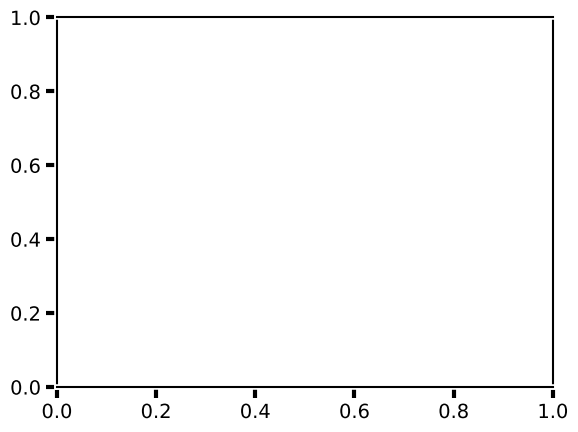

In [25]:
# Execute the code
plt.bar(list(wins.keys()),list(wins.values()),alpha=0.5)
plt.xlabel('Sprinters')
plt.ylabel('Race wins',rotation=0,labelpad=30)

## Why is Joy winning so much ?

Let us analyze why exactly is Joy winning so frequently in our simulations.
But first, we will need to record the sprint timings for each sprinter in every simulation.

We will again run 10,000 simulations but this time record the individual sprint timings for each simulation instead.

- Make a new dictionary `race_results` with keys as the name of sprinters and the value as an empty list. We will append race results to this list after each simulation.
- Inside the simulation loop, loop through the items of the `race_results` dictionary, and for each participant :
    - Calculate time by calling `.time`
    - `append` time to the list for participant in `race_results`

In [27]:
# Run the earlier simulation and store all 10000 times given by a participant
# race_results has a list of times as values for a given key( i.e participant)
# So for a key it has a corresponding list of times for that participant.

race_results= {sprinter:[] for sprinter in sprinters_dict.keys()}
for simulation in range(10000):
    for sprinter,dash in sprinters_dict.items():
        sprint_timing = dash.time
        race_results[sprinter].append(sprint_timing)

race_results

{'Pavlos': [12.789031976024374,
  12.491134067488144,
  12.736062729938835,
  13.282897694044376,
  13.321459115054434,
  12.972278484740416,
  12.944772224574336,
  12.772456373682964,
  13.099369805534918,
  13.11070808763549,
  13.511021475563634,
  13.54066923044811,
  12.862697214203434,
  12.785377318169248,
  13.282868215877551,
  12.816162067630815,
  12.95446837742347,
  12.820207778373407,
  12.966097042825208,
  12.746695362229081,
  12.785002785011738,
  12.688814638726402,
  12.955658391397925,
  12.616275544308944,
  12.924714447973425,
  12.934457062458828,
  13.036850726070154,
  13.69636361167547,
  12.886508963577104,
  12.737252160760825,
  12.83238623554308,
  13.160391758954676,
  12.689340182969563,
  13.265133899205983,
  13.169542530253846,
  12.795098021882247,
  13.062085505230609,
  13.256558317097099,
  13.038963286320529,
  12.808926632951543,
  13.309635712601203,
  12.655013711572712,
  13.002756193315092,
  12.654794051022176,
  13.024030193372143,
  13.

### Sample mean $\bar{x}$ sample standard deviation $s$


Now we have a list of times given by each participant. We have the complete distribution, so let's calculate the mean, std and confidence interval.

As discussed in the lecture, if we have a given sample, we can quickly compute the mean and standard deviation using `np.mean()` and `np.std()`.

Let's begin with the race results for `Pavlos`.

In [28]:
# Using the race_results dictionary, find the mean
# and std for 'Pavlos'
pavlos_mean = np.mean(race_results['Pavlos'])
pavlos_std = np.std(race_results['Pavlos'])
print(f'The average pace of Pavlos is {pavlos_mean:.2f} and the sample std is {pavlos_std:2f}')

The average pace of Pavlos is 13.00 and the sample std is 0.248981


### Sample mean $\bar{x}$ sample standard deviation $s$ for all sprinters

For each sprinter in the `race_results` dicitionary, find the mean and standard deviation of the 10,000 simulations using the `np.mean()` and `np.std()` functions.

Store your findings in a new dictionary called `race_stats` as a list. So the `race_stats` dictionary has a list of corresponding stats for each participant(key)

In [29]:
# loop through the keys of race_results
# calculate mean and std of each participant using np.mean() and np.std()
# Assign these stats to the key, as a list
race_stats = {}
for sprinter in race_results.keys():
    sprinter_mean = np.mean(race_results[sprinter])
    sprinter_std = np.std(race_results[sprinter])
    race_stats[sprinter] = [sprinter_mean, sprinter_std]

In [30]:

# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Sprinter", "Sample mean", "Sample std"]

for sprinter,stats in race_stats.items():
    pt.add_row([sprinter, round(stats[0],3),round(stats[1],3)])

print(pt)

+----------+-------------+------------+
| Sprinter | Sample mean | Sample std |
+----------+-------------+------------+
|  Pavlos  |    13.002   |   0.249    |
|  Hargun  |    12.507   |   0.491    |
|   Joy    |    12.257   |   1.013    |
|  Hayden  |    14.489   |   1.001    |
+----------+-------------+------------+


### Confidence Interval
Confidence interval is the range of values for which we can claim a certain confidence level(95% mostly). The confidence interval represents values for the population parameter for which the difference between the parameter and the observed estimate is not significant at the 5% level.

- Use `np.percentile()` to calculate the 95% CI.
- Calculate `np.percentile` at 2.5 and 97.5 to get the interval.
- Calculate and append these to the list of stats in the `race_stats` dictionary, for each participant

In [31]:
#By using the race_results dictionary defined above,
# Find the 2.5 and 97.5 percentile of Hargun's race runs.
CI = np.percentile(race_results['Hargun'],[2.5,97.5])
print(f'The 95% confidence interval for Hargun is {round(CI[0],2),round(CI[1],2)}')

The 95% confidence interval for Hargun is (np.float64(11.53), np.float64(13.48))


### Confidence intervals for all sprinters.

Let's repeat the above for each sprinter.
You will add this information to your `race_stats` dictionary.

We expect you to append the $2.5$ and the $97.5$ percentile values to the existing stats list for each sprinter.

For e.g., if for `Pavlos`, we have `mean=13.00`, `std=0.1`, and CI as `(12.8,13.2)`, your `race_stats['Pavlos']` must look like: `[13.00,0.1,12.8,13.2]`.

In [32]:
# Now lets repeat the same, but for every sprinter
# run through the race_results dictionary for each sprinter
# find the confidence interval, and add it to the race_stats dictionary
# defined above
# Hint: You can use the .extend() method to add it to the existing list of stats
for sprinter,runs in race_results.items():
    ci = np.percentile(runs, [2.5, 97.5])
    race_stats[sprinter].extend(ci)

In [33]:
# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Sprinter", "Sample mean", "Sample std","95% CI"]

for sprinter,stats in race_stats.items():
    mean = round(stats[0],3)
    std = round(stats[1],3)
    confidence_interval = (round(stats[2],3),round(stats[3],3))
    pt.add_row([sprinter, mean,std,confidence_interval])

print(pt)

+----------+-------------+------------+------------------------------------------+
| Sprinter | Sample mean | Sample std |                  95% CI                  |
+----------+-------------+------------+------------------------------------------+
|  Pavlos  |    13.002   |   0.249    | (np.float64(12.516), np.float64(13.497)) |
|  Hargun  |    12.507   |   0.491    | (np.float64(11.534), np.float64(13.482)) |
|   Joy    |    12.257   |   1.013    | (np.float64(10.254), np.float64(14.24))  |
|  Hayden  |    14.489   |   1.001    | (np.float64(12.513), np.float64(16.487)) |
+----------+-------------+------------+------------------------------------------+


## Histogram plot for each sprinter

Run the following cell to get a cool plot for distribution of times.

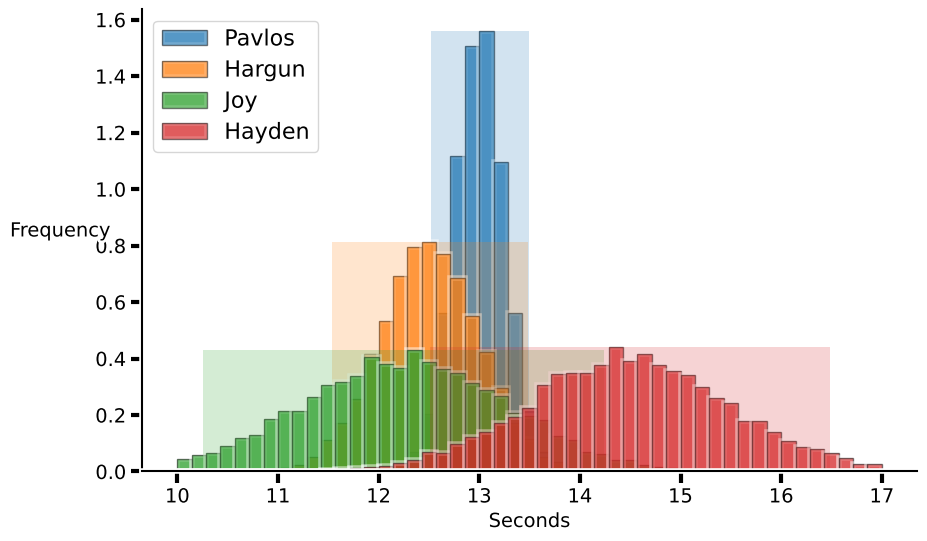

In [34]:
fig = plt.gcf()
fig.set_size_inches(10,6)
bins = np.linspace(10, 17, 50)

for sprinter,runs in race_results.items():
    height, bins, patches = plt.hist(runs, bins, alpha=0.5, \
                            label=sprinter,density=True,edgecolor='k')
    plt.fill_betweenx([0, height.max()], race_stats[sprinter][2], race_stats[sprinter][3], alpha=0.2)
plt.legend(loc='upper left',fontsize=16)
plt.xlabel('Seconds')
plt.ylabel('Frequency',rotation=0,labelpad=25)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

## ⏸ Take a look at the histograms for each participant and comment on why do you think Joy is winning the most races?

A. Very consistent distribution

B. Low base time and not a very high spread

C. High base time but variation causes lower times to show more frequently

D. Joy is not winning the most races


In [35]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A put 'A')

answer = 'C'

## ⏸ What **one parameter** should Hargun change in order to win more races?

A. Reduce base time

B. Reduce consistency

C. Relax before the race

D. Increase consistency

In [36]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A put 'A')

answer = 'A'

## 👩🏻‍🎓 Bonus (Not graded)

Find out who among has would have the most podium finishes (top 3).

In [ ]:
# Your code here